In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('COVIDdemographic.csv')
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [4]:
df = df[['State', 'cases', 'deaths', 'Total Population', 'Total population_Male', 'Total population_Female']]
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female
0,Alabama,387786,14345,4887871,2369271,2518600
1,Alaska,18316,367,737438,382952,354486
2,Arizona,426614,18857,7171646,3565129,3606517
3,Arkansas,161569,3301,3013825,1476680,1537145
4,California,2664110,102387,39557045,19673553,19883492


In [5]:
df = df.drop(columns = ['cases', 'deaths'])
df.head()

,State,Total Population,Total population_Male,Total population_Female
0,Alabama,4887871,2369271,2518600
1,Alaska,737438,382952,354486
2,Arizona,7171646,3565129,3606517
3,Arkansas,3013825,1476680,1537145
4,California,39557045,19673553,19883492


In [6]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [7]:
df = pd.merge(df, COVID_Case, how = 'left', on = 'State')
df.head()

,State,Total Population,Total population_Male,Total population_Female,cases,deaths
0,Alabama,4887871,2369271,2518600,26912,785
1,Alaska,737438,382952,354486,751,10
2,Arizona,7171646,3565129,3606517,39298,1228
3,Arkansas,3013825,1476680,1537145,13191,188
4,California,39557045,19673553,19883492,159098,5202


In [8]:
df.shape

(51, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State                    51 non-null     object
 1   Total Population         51 non-null     int64 
 2   Total population_Male    51 non-null     int64 
 3   Total population_Female  51 non-null     int64 
 4   cases                    51 non-null     int64 
 5   deaths                   51 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ KB


In [10]:
df.isnull().sum()

State                      0
Total Population           0
Total population_Male      0
Total population_Female    0
cases                      0
deaths                     0
dtype: int64

In [11]:
df.describe()

,Total Population,Total population_Male,Total population_Female,cases,deaths
count,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,6.415048e+06,3.159179e+06,3.255868e+06,41994.235294,2290.549020
std,7.343308e+06,3.628720e+06,3.715146e+06,63513.183767,4748.588326
min,5.777370e+05,2.926190e+05,2.851180e+05,614.000000,10.000000
25%,1.780020e+06,8.884075e+05,8.916125e+05,9231.500000,212.000000
50%,4.468402e+06,2.199021e+06,2.269381e+06,20152.000000,704.000000
75%,7.353618e+06,3.665994e+06,3.687624e+06,46961.500000,2469.500000
max,3.955704e+07,1.967355e+07,1.988349e+07,389349.000000,30683.000000


In [12]:
corr = df.corr()
corr

,Total Population,Total population_Male,Total population_Female,cases,deaths
Total Population,1.000000,0.999922,0.999926,0.661893,0.452008
Total population_Male,0.999922,1.000000,0.999696,0.656220,0.445202
Total population_Female,0.999926,0.999696,1.000000,0.667335,0.458589
cases,0.661893,0.656220,0.667335,1.000000,0.957358
deaths,0.452008,0.445202,0.458589,0.957358,1.000000


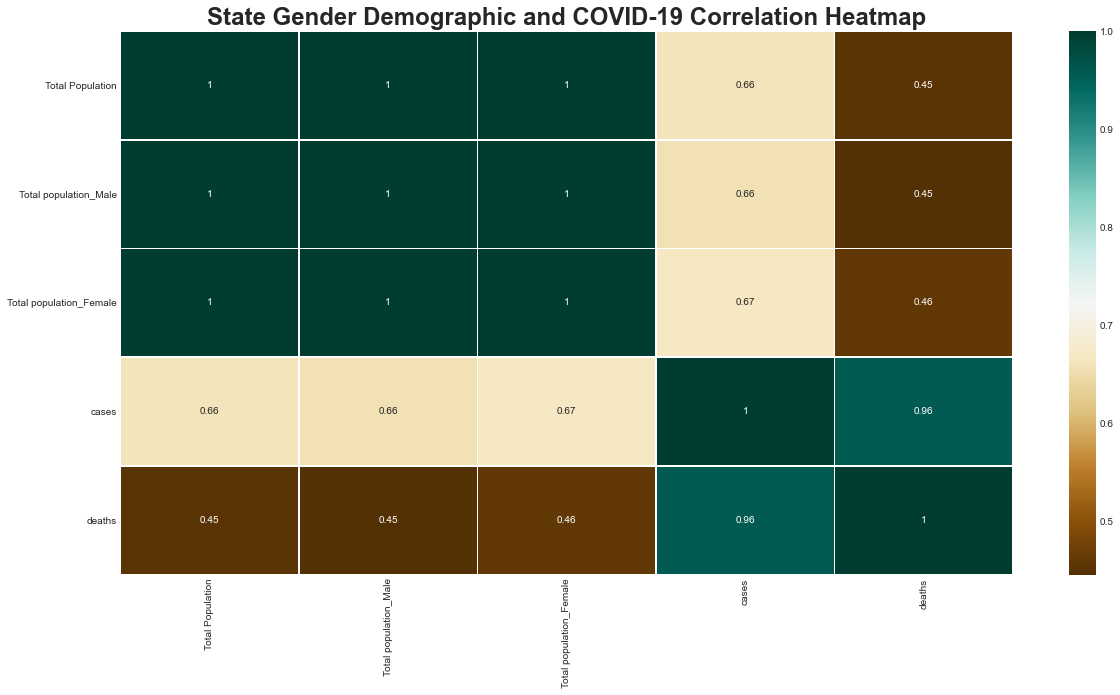

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Gender Demographic and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360);

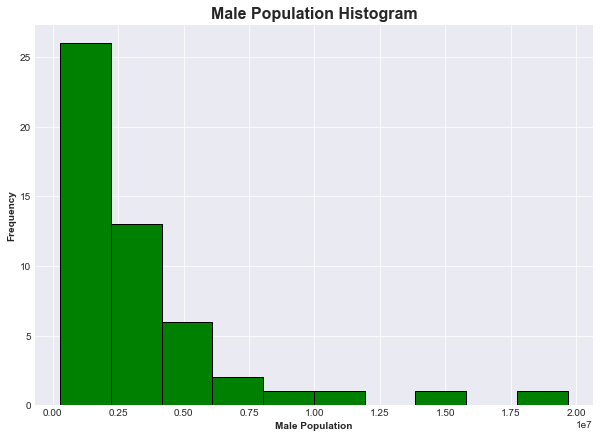

In [24]:
plt.style.use('seaborn-darkgrid')

df['Total population_Male'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Male Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Male Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

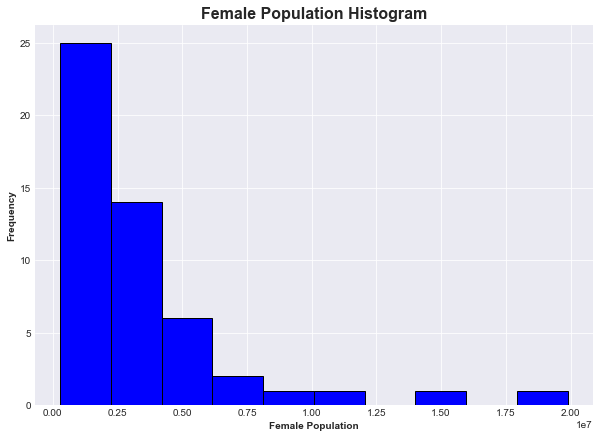

In [25]:
plt.style.use('seaborn-darkgrid')

df['Total population_Female'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Female Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Female Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

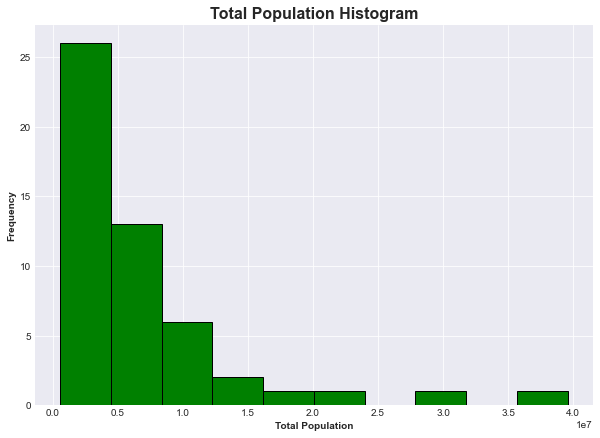

In [26]:
plt.style.use('seaborn-darkgrid')

df['Total Population'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Total Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

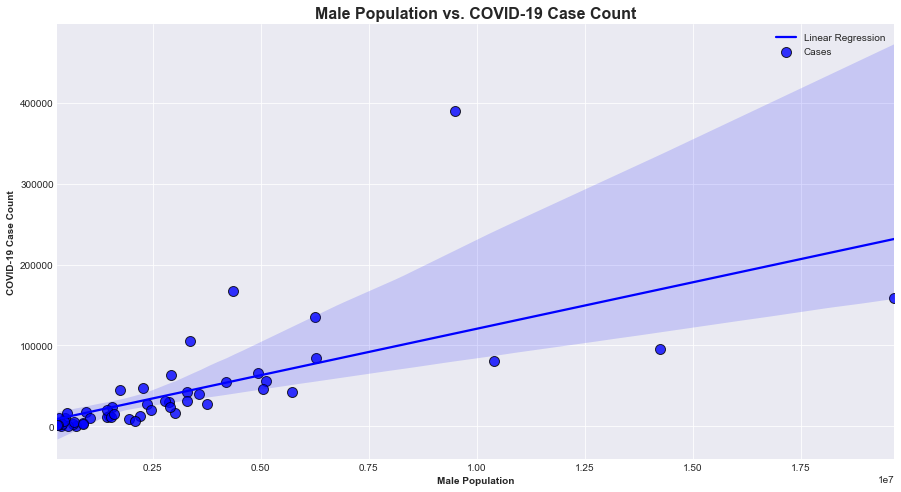

In [39]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total population_Male', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Male Population vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Male Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [49]:
spearmanr(df['cases'], df['Total population_Male'])

SpearmanrResult(correlation=0.8952036199095021, pvalue=7.973903201505915e-19)

In [28]:
model1 = sm.OLS(df['cases'], df['Total population_Male']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              75.95
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.33e-11
Time:                        18:28:13   Log-Likelihood:                         -621.72
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Total population_Male     0.0123      0.001      8.715      0.000       0.009       0.015
==============================================================================
Omnibus:                       71.673   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.986
Skew:                           3.645   Prob(JB):                    3.58e-181
Kurtosis:                      21.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

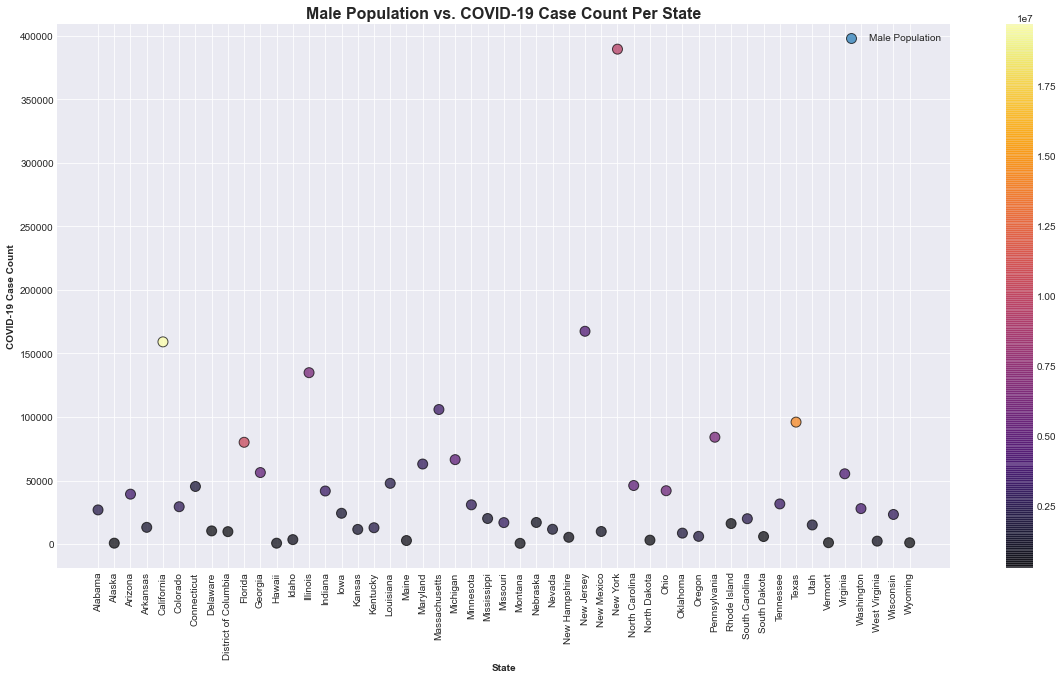

In [43]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Total population_Male'], cmap = 'inferno')
plt.title('Male Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Male Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

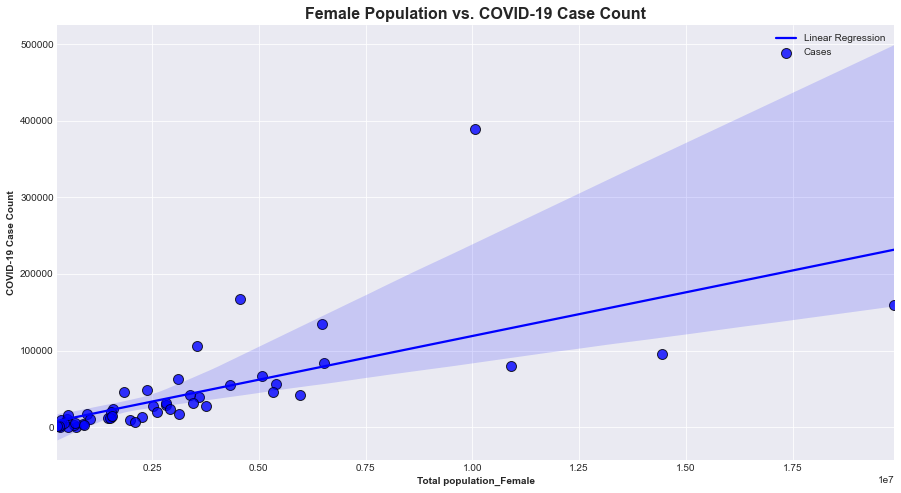

In [50]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total population_Female', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Female Population vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total population_Female', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [51]:
spearmanr(df['cases'], df['Total population_Female'])

SpearmanrResult(correlation=0.9009954751131221, pvalue=2.120975341772143e-19)

In [32]:
model2 = sm.OLS(df['cases'], df['Total population_Female']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.614
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              79.56
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    6.51e-12
Time:                        18:30:01   Log-Likelihood:                         -620.99
No. Observations:                  51   AIC:                                      1244.
Df Residuals:                      50   BIC:                                      1246.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Total population_Female     0.0121      0.001      8.920      0.000       0.009       0.015
==============================================================================
Omnibus:                       71.245   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.287
Skew:                           3.619   Prob(JB):                    9.18e-178
Kurtosis:                      21.201   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

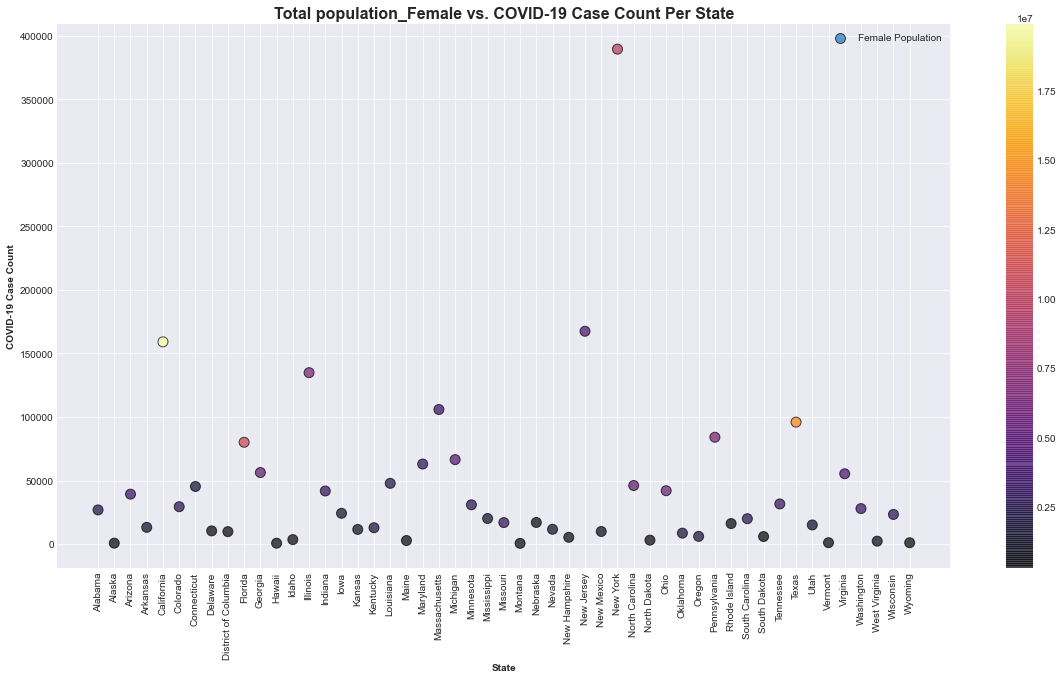

In [44]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Total population_Female'], cmap = 'inferno')
plt.title('Total population_Female vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Female Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

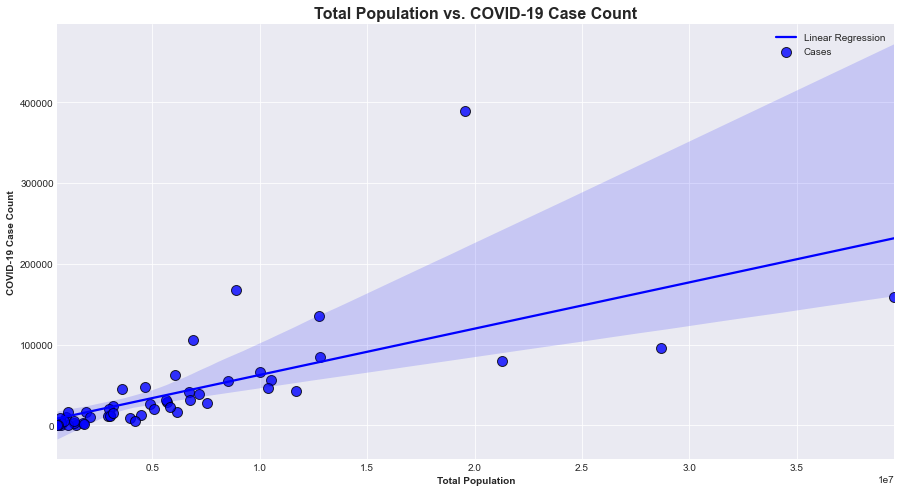

In [46]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Population', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Population vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [52]:
spearmanr(df['cases'], df['Total Population'])

SpearmanrResult(correlation=0.8960180995475113, pvalue=6.6503977558606605e-19)

In [47]:
model3 = sm.OLS(df['cases'], df['Total Population']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              77.77
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    9.26e-12
Time:                        18:35:14   Log-Likelihood:                         -621.35
No. Observations:                  51   AIC:                                      1245.
Df Residuals:                      50   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Population     0.0061      0.001      8.818      0.000       0.005       0.007
==============================================================================
Omnibus:                       71.460   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.169
Skew:                           3.632   Prob(JB):                    1.78e-179
Kurtosis:                      21.292   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

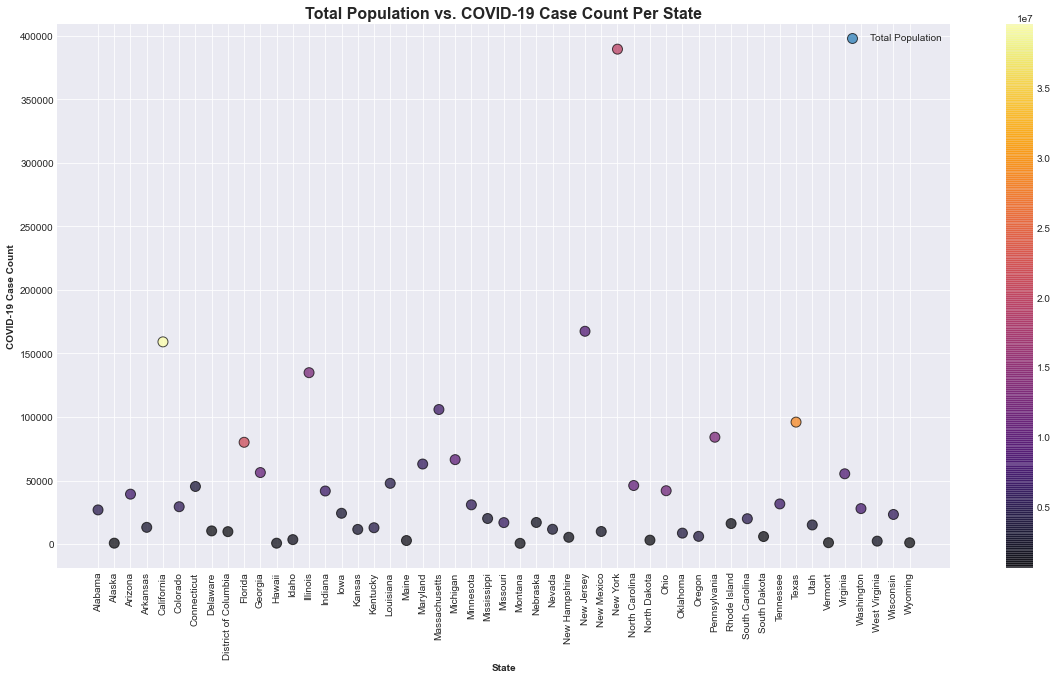

In [48]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Total Population'], cmap = 'inferno')
plt.title('Total Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [45]:
model4 = sm.OLS(df['cases'], df[['Total population_Male', 'Total population_Female']]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              74.12
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.52e-15
Time:                        18:34:24   Log-Likelihood:                         -609.76
No. Observations:                  51   AIC:                                      1224.
Df Residuals:                      49   BIC:                                      1227.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Total population_Male      -0.3120      0.060     -5.208      0.000      -0.432      -0.192
Total population_Female     0.3159      0.058      5.413      0.000       0.199       0.433
==============================================================================
Omnibus:                       35.615   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.488
Skew:                           1.528   Prob(JB):                     1.59e-42
Kurtosis:                      12.013   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""